In [60]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:

##Especializadas
#Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_predict

#estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

##
import pmdarima as pm

1. Descargar la base de datos


In [62]:
Accion = pd.read_excel('ACMX.xlsx', index_col='Date', parse_dates=True)

In [63]:
Accion.head()

,Adj Close
Date,
2003-01-01,7.465083
2003-02-01,6.714626
2003-03-01,7.311482
2003-04-01,7.399253
2003-05-01,7.285151


In [64]:
Accion.dtypes

Adj Close    float64
dtype: object

In [65]:
#Se especifica frecuencia mensual ('MS') significa Month Start, que hace referencia a que cada fecha es un inicio de mes
Accion=Accion.asfreq('MS')

In [66]:
Accion.index

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01'],
              dtype='datetime64[ns]', name='Date', length=259, freq='MS')

In [67]:
#Se verifican nulos
Accion.isnull().sum()

Adj Close    0
dtype: int64

Text(0, 0.5, 'Precio')

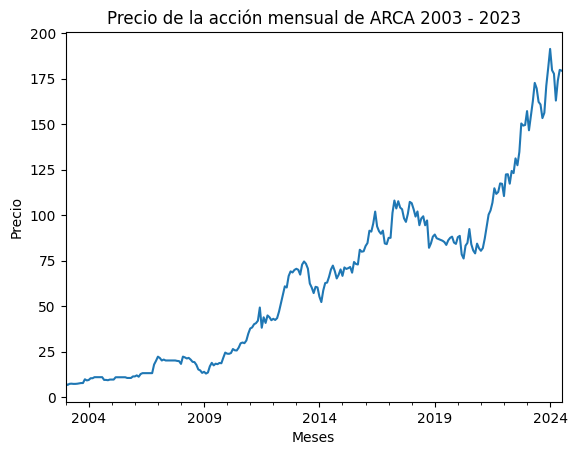

In [95]:
Accion['Adj Close'].plot()
plt.title('Precio de la acción mensual de ARCA 2003 - 2023')
plt.xlabel('Meses')
plt.ylabel('Precio')

Se realiza Prueba Dickie-Fuller Aumentada para verificar si la serie es estacionaria o no

One way to test whether a time series is stationary is to perform an augmented Dickey-Fuller test, which uses the following null and alternative hypotheses:

H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

HA: The time series is stationary.

If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

Reference: https://www.statology.org/dickey-fuller-test-python/

In [69]:
prueba_adf = adfuller(Accion['Adj Close'])
pvalue = prueba_adf[1]
pvalue.round(3)

0.998

In [70]:
#Se realiza la técnica de las primeras diferencias para hacer estacionaria la serie
Accion['1stDiff'] = Accion['Adj Close'].diff()

Text(0, 0.5, 'Primeras diferencias ARCA')

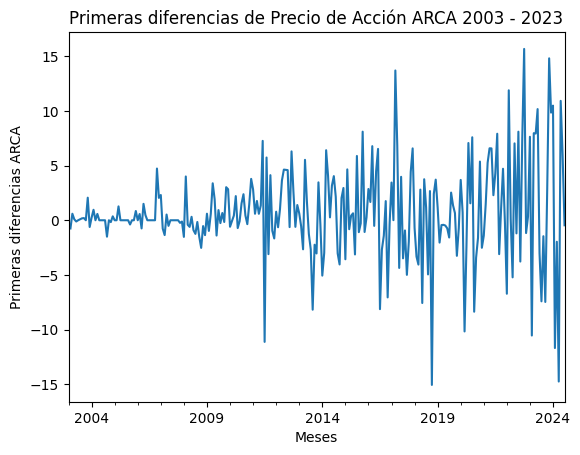

In [94]:
Accion['1stDiff'].plot()
plt.title('Primeras diferencias de Precio de Acción ARCA 2003 - 2023')
plt.xlabel('Meses')
plt.ylabel('Primeras diferencias ARCA')

La serie parece ser estacionaria, se va a comprobar a continuación con la prueba Dickie-Fuller Aumentada


In [72]:
prueba_adf1 = adfuller(Accion['1stDiff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(3)

0.0

In [73]:
arimaOrder_aic = pm.auto_arima(Accion['Adj Close'],
                               start_p=1, start_q=1,
                               max_p=7, max_q=7,
                               information_criterion='aic') 

arimaOrder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)>

In [74]:
arimaOrder_aic = pm.auto_arima(Accion['Adj Close'],
                               start_p=1, start_q=1,
                               max_p=7, max_q=7,
                               information_criterion='bic') 

arimaOrder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)>

In [75]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(Accion['Adj Close'], order=(ar, 1, ma)) #¿Sería lo mismo poner Indicador['1stDiff].dropna(), order=(ar,0,ma)?
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 3
AR: 2, MA: 4


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 5


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 5


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 4


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
ic.sort_values('AIC').head(15)

AIC          BIC
AR MA                          
6  5   1469.581700  1512.217215
   4   1469.754961  1508.837517
5  5   1470.241852  1509.324407
6  6   1470.965627  1517.154101
5  6   1470.991407  1513.626922
4  6   1472.416951  1511.499506
   5   1473.005090  1508.534686
5  4   1473.087829  1508.617425
4  4   1474.827354  1506.803991
   2   1478.707587  1503.578304
2  4   1478.766851  1503.637568
5  1   1482.625790  1507.496507
3  3   1483.420381  1508.291098
   5   1483.600802  1515.577439
1  5   1484.021900  1508.892617

In [77]:
model = ARIMA(Accion['Adj Close'], order=(6,1,5))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  259
Model:                 ARIMA(6, 1, 5)   Log Likelihood                -722.791
Date:                Wed, 17 Jul 2024   AIC                           1469.582
Time:                        01:11:36   BIC                           1512.217
Sample:                    01-01-2003   HQIC                          1486.726
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4014      0.129      3.106      0.002       0.148       0.655
ar.L2          0.5658      0.073      7.730      0.000       0.422       0.709
ar.L3         -0.3853      0.098     -3.939      0.0

c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [78]:
forecast = results.get_forecast(steps=2)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [79]:
Accion.tail()

,Adj Close,1stDiff
Date,,
2024-03-01,177.758209,-1.966080
2024-04-01,163.017578,-14.740631
2024-05-01,173.929993,10.912415
2024-06-01,179.899994,5.970001
2024-07-01,179.440002,-0.459992


In [88]:
inicio = '2024-08-01'
fin = '2024-10-01'

In [89]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [90]:
df_forecast = pd.DataFrame({
    'pronostico': pronostico_valor,
    'limite inf': pronostico_intervalos['lower Adj Close'],
    'limite sup': pronostico_intervalos['upper Adj Close']
})

In [92]:
df_forecast

,pronostico,limite inf,limite sup
2024-08-01,184.945900,177.243576,192.648224
2024-09-01,181.206111,170.216853,192.195369
